Mounted at /content/drive
Slope: [5.44814029]
Intercept: -102360.54329387983
Score Training: 0.04550919269952436
Score Testing: -1.48499241736851


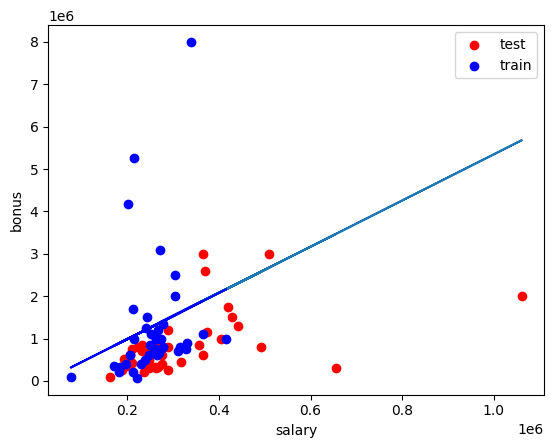

In [1]:
"""
    Regresión.

    Dibuja un diagrama de dispersión de los datos de entrenamiento/prueba.

    Resultados:
    Salary and bonus
    Slope: [ 5.44814029]
    Intercept: -102360.543294
    Score Training: 0.0455091926995
    Score Testing: -1.48499241737

    Long term incentive and bonus
    Slope: [ 1.19214699]
    Intercept: 554478.756215
    Score Training: 0.217085971258
    Score Testing: -0.59271289995
"""


import sys
import pickle
import joblib

# Mount Google Drive
# Cambiar las rutas de archivos según corresponda
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/IA - Programa Posgrado/Lesson01/')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/IA - Programa Posgrado/Lesson01/')

# Asegurar que el archivo 'final_project_dataset_modified.pkl' está en la carpeta 'tools'
sys.path.append("./tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = joblib.load( open("./tools/final_project_dataset_modified.pkl", "rb") )

### Enumerar las características (features) que se desea ver: el primer elemento
### de la lista será la característica "objetivo" (target)
features_list = ["bonus", "salary"]

# Asegurar que el archivo 'python2_regression_keys.pkl' está en la carpeta 'tools'
data = featureFormat( dictionary, features_list, remove_any_zeroes=True, sort_keys = './tools/python2_regression_keys.pkl')
target, features = targetFeatureSplit( data )

### En la regresión, se necesita división entre entrenamiento y prueba,
### igual que en la clasificación.
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

### La regresión va aquí
### Asignar nombre reg, para que luego se pueda dibujar.
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(feature_train,target_train)
print ("Slope:", reg.coef_)
print ("Intercept:", reg.intercept_)
print ("Score Training:", reg.score(feature_train, target_train))
print ("Score Testing:", reg.score(feature_test, target_test))

### Dibujar el diagrama de dispersión, con puntos de prueba y entrenamiento codificados por colores
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color )
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color )

### etiquetas para la leyenda
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

### dibujar la línea de regresión
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

plt.plot(feature_train, reg.predict(feature_train), color="b")
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()